# Important note:

This notebook doesn't display correctly using the github notebook viewer (which is what you will see if you use a web browser without running Jupyter notebook). Some equations will be missing, others will be wrong.

# Control theory

Suppose that you want to maintain the temperature of some part of an experiment. You have a heater. You have a temperature sensor. The problem is: how to control the heater in such a way as to stabilise the temperature quickly, and accurately, to some desired value.

This is an example of a control theory problem. It is also called a servo-system problem. There are whole courses in engineering devoted to these problems and coming up with solutions. We are going to skim the subject just so that you are aware that it exists, and know where to go if you come up with these sorts of problems in your career as a physicist.

Control theory starts with the concept of a *plant*, in the sense of a well-defined system. A physicist might prefer to use the term *system*, or *experiment* rather than *plant*, but we will defer to our engineering colleagues and over 100 years of historical usage.

The plant has one of more *control inputs*, these are the things that you can alter to change the behaviour of the system. The plant also has one or more *outputs* - these are observable quantities such as the temperature. The plant may also have *disturbances* such as changes in environmental conditions with time.

Some examples will hopefully make this clearer:

```
  Plant        Input(s)          Disturbance(s)      Output(s)
  ------------------------------------------------------------
  Electrical   Voltage on        Change in ambient   Temperature at 
  heater       heater resistor   temperature         a point
  
  Car          Accelerator       Road gradient,      Speed
               pedal depression  wind
  
  Car          Steering wheel    Road direction,     Angle of car
               position          road camber,        relative to the
                                 road condition      road
                                 
  Skier        Forces on the     Change in slope,    Velocity,
               skies             ice conditions,     body position,
                                 wind                ski angles
                                 
  Gravitat-    Multiple          Ground vibration    Mirror positions
  ional wave   actuators 
  detector
                                 
  "Big Dog"    Motor torques     Changes in          Robot position
  Boston                         environment
  Dynamics
  -------------------------------------------------------------
```

The human brain is adept at solving practical problems in control theory (such as walking, running, skiing, roller-blading, ice-skating) by a process of exploring the behaviour as the input change. When you first learn a new skill you will be very tentative. As you gain experience you will become more confident. Sleep seems to be the period where the brain consolidates its knowledge of new servo-system experiences.

For examples of really complex servo-systems, see the following videos.

Boston Dynamics Big Dog [https://www.youtube.com/watch?v=cNZPRsrwumQ]

Boston Dynamics Spot Mini [https://www.youtube.com/watch?v=tf7IEVTDjng]

In physics, an understanding of control theory can be very helpful. Many experiments require some quantity to be stabilised. A common example is to keep the temperature of some part of the experiment constant. If the control isn't optimal, then the temperature may oscillate or otherwise diverge from the set point, and this can dramatically affect the experiment.

## Examples from M. Ashley's experiences

As an astronomer I often use instruments based on CCDs (Charged Coupled Devices). Just about every parameter of a CCD (quantum efficiency, read noise, gain, hot pixel distribution, dark current, flat field response, bias response, colour sensitivity, etc) depends on temperature. It is therefore crucial to control the temperature of the CCD, certainly within a few degrees K, and ideally better than 0.1K.

The temperature of a CCD is usually measured using a component on the same chip as the CCD, e.g., the forward voltage drop of a silicon diode, which has a -2mV/K dependence on temperature. The temperature is usually controlled by an electrical heater, which warms the CCD up above some baseline temperature set by a cooling system such as liquid nitrogen, a closed-cycle refrigerator, or a peltier effect device.

The main issue with CCD temperature control is that there is a time delay between changing the power in the heater element and the affect on the CCD temperature. This makes for a challenging control problem, since it is very easy for the system to oscillate or take a long time to stabilise.

In general with temperature regulation systems it is best to place the temperature sensor very close to the heater, in order to minimise the response time constant. However, the sensor also needs to be as close as possible to the device you are trying to regulate, and this isn't always compatible with the earlier requirement.

### Leach controller temperature regulation

In my first example, I needed to improve the temperature regulation of a CCD being driven by a "Leach controller" - a standard astronomical piece of electronics that has a long history. The problem was that the CCD temperature was taking a long time to stabilise if the ambient conditions changed. Further inspection showed that the system had the following problems:

* The signal from the temperature sensor was noisy.
* The ADC that read the temperature sensor had insufficient resolution: 1 ADU was about 1C.
* The control algorithm was not tuned properly, i.e., the command to the heater was not optimal given the difference between the temperature set-point, the actual temperature, and the derivative of the actual temperature.

I was able to fix this by doing the following:

* Improving the sensor noise by small modifications to the cabling from the sensor, and modifying the preamplifier that fed the ADC. This reduced the noise from 10 ADU peak-to-peak to less than 1 ADU.
* Averaging a large number (1024) measurements from the ADC. Each measurement took a millisecond, so the averaging only required a second, which was acceptable given the thermal time constants of the system.
* Tests then showed that the ADC was very stable, and it would be worth adding a 1-2 bits of well-controlled noise to the signal. I added the noise using an unused DAC output from the Leach controller to inject "noise" (in practice, a linear ramp signal, synchronised to the averaging period). This allowed sub-LSB digitisation, yielding an extra 6 bits of resolution. This is particularly useful for determining the derivative of the temperature, which is crucial in order to anticipate the future evolution.
* Using control theory (the point of these two lectures!) to derive a close-to-optimal setting for the heater power.

The end result of these changes was a greatly improved temperature regulation, as can be seen from the following plots.

The image below shows the original stability of the CCD temperature. The lower plot is before fixing the amplifier noise, and the upper one is after. Note the large amplitude oscillation with a period of about 10 minutes. Note also that the amplifier noise is not well behaved, so it is worth trying to eliminate it rather than simply averaging it out.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f1.png)

This plot shows the result of average 1024 measurements, after the improvements to the amplifier noise. You can now see the steps resulting from the ADC digitisation. The very regular nature of this plot indicates that the system is ideally suited to the addition of some noise to allow sub-LSB sampling.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f2.png)

This last plot shows the final performance of the system, using sub-LSB sampling to increase the resolution to 1/64th of an ADU (i.e., an extra 6 bits of resolution). The temperature now stabilises within a few minutes, with residual oscillations at the 0.01K level. The plot shows that the system is slightly under-damped, which gives scope for addition improvement to transient response.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f3.png)

### CCD temperature at Dome A

More recently I have been working with a CCD camera at Dome A in Antarctica. The commercial camera had a design flaw whereby the time constant between the heater and its affect on the CCD temperature was around 10 minutes, whereas the controller the manufacturer had used was designed for time constants only up to around 10 seconds. Consequently, the CCD temperature oscillated wildly (up to 10C peak-to-peak), with a period of ten minutes. An additional problem is that every time the heater turned on, it caused the apparent CCD temperature to instantaneously jump by a couple of degrees, due to ground loops in the temperature sensor circuitry.

The following photo shows the CCD chip (large flat square at the top). The Peltier cooler is underneath the copper block, and it takes tens of minutes for heat to flow from the CCD to the cooler.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/sDSC03560.jpg)

Solving this control problem was difficult since the problem was only discovered after the system was deployed to Antarctica, and after everyone had left the site - not to return for 11 months. Furthermore, there was no way to disable the controller remotely. The only control variable that we had was to alter the set-point. Fortunately, it was possible to design an algorithm (using control theory!) to update the set-point once a second to effectively take control away from the commercial controller. While not an ideal solution, the achieved performance was far superior to what we originally had.

The plot below shows the original situation with the CCD temperature. The set-point is shown in green, the measured temperature is shown in red. Where the red curve is smooth, the peltier cooler is trying to reach the set point, but is unable to do so. When the red curve shows "noise", the set point has been reached and the controller is causing the temperature to oscillate by almost 10K peak-to-peak on a timescale of about 10 minutes.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f4.png)

The plot below shows the situation after using a script to adjust the set-point once a second. The desired temperature was changed at 12 minutes, and you can see that the CCD temperature declined roughly linearly over 5 minutes or so and then stabilised to better than 1K with a few oscillations. While not ideal, this is a big improvement over the original situation. Further progress was hampered by the effect of the peltier cooler current on the apparent CCD temperature.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/f5.png)

## The key take-away message from these examples

The important take-away message from the above examples with the CCDs is that a modest knowledge of control theory can significantly improve a physics experiment. Don't just expect that a commercial off-the-shelf system will work. If you see unstable oscillating behaviour, it should be possible to fix it.


## Open loop, closed loop

The problem that control theory addresses is: how do you set the control input for a plant to best achieve a desired output?

There are two fundamental approaches to controlling a plant:

* *Open loop*, i.e., you set the control input(s) purely on the basis of the desired output(s) (and possibly your knowledge of the disturbance(s)).

* *Closed loop*, you compare the output(s) with the desired output(s) (the *reference(s)*) and use this information, together with your knowledge of the disturbance(s) and the plant, to set the control input(s).

Pretty obviously, open loop isn't going to be very effective in most situations (e.g., imagine trying to ski open loop!).

Closed loop control is also known as *feedback control*, i.e., you take a sample of the plant output, and feed this back to the input in such a way as to stabilise the system.

## Analytic solutions to plant behaviour

To make control problems tractable, we are going to concentrate on relatively simple systems: those with one input, one output, and governed by linear ODEs with non time-varying coefficients (although we will allow the forcing functions to vary with time). Recall that a "linear" ODE is one with at most first power in the independent variable and its derivatives.

These systems are often called LTI, for Linear Time Invariant.

For example, here is a first order linear ODE with a forcing function $u(t)$:

$$\dot y+ky=u(t)$$

## How to solve linear ODEs

Using the above ODE as an example, let's explore how we might solve it. First, realise that if we apply the same operation to both sides of the ODE, the equation remains true. E.g., we could multiply both sides by 2. More interestingly, we can apply a mathematical *transform* to both sides of the equation.

Now, without justifying the choice at this stage, let's see what happens if we apply the Laplace transform, defined by

$$\mathscr{L}\{f(t)\}=\int_0^\infty f(t)e^{-st}dt=F(s)$$

To get a feel for the Laplace transform, let's plot $e^{-st}$ for various values of $s$:

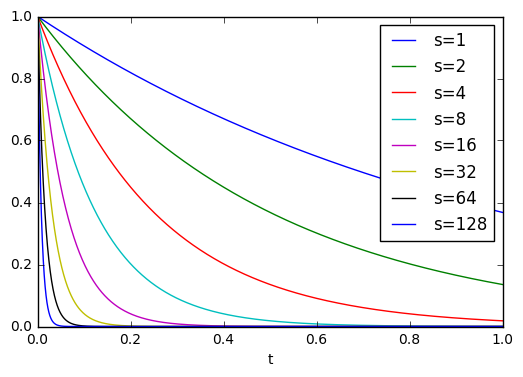

In [23]:
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# Make a numpy array of 1000 time points from t=0 to t=1.

t = np.linspace(0, 1, 1000)

# Plot e^{-st} for various value of s.

plt.plot(t, np.exp(-t), label='s=1')
plt.plot(t, np.exp(-2*t), label='s=2')
plt.plot(t, np.exp(-4*t), label='s=4')
plt.plot(t, np.exp(-8*t), label='s=8')
plt.plot(t, np.exp(-16*t), label='s=16')
plt.plot(t, np.exp(-32*t), label='s=32')
plt.plot(t, np.exp(-64*t), label='s=64')
plt.plot(t, np.exp(-128*t), label='s=128')
plt.legend()
plt.xlabel("t")

plt.show()

In the above plots, the curves that decay most quickly have the highest values of $s$. The Laplace transform can be considered to be a weighted-sampling of the time behaviour of the system. Small values of $s$ sample the long-term behaviour, large values of $s$ capture what is happening close to $t=0$.

Note that $s$ can be a complex number, as can be the Laplace transform. Complex numbers are useful in the context of control theory since $e^s$ can represent an exponential or an oscillation; they encapsulate amplitude and phase information in one complex number.

### Key properties of Laplace transforms

#### SUPERIMPOSITION

$$\mathscr{L}\{\alpha f_1(t)+\beta f_2(t)\} = \alpha\mathscr{L}\{f_1(t)\}+\beta\mathscr{L}\{f_2(t)\}$$

The above property makes it easy to find the Laplace transform of functions that are the sum of functions with known transforms (typically found by looking them up in a table).

#### DIFFERENTIATION

$$\mathscr{L}\{\dot f\}=sF(s)-f(0^-)$$
$$\mathscr{L}\{\ddot f\}=s^2F(s)-sf(0^-)-\dot f(0^-)$$
$$\mathscr{L}\{\dddot f\}=s^3F(s)-s^2f(0^-)-s\dot f(0^-)-\ddot f(0^-)$$

and so on for higher order derivatives, where $f(0^-)$ is the value of $f(t)$ immediately before $t=0$.

These relationships are the most important property of the Laplace transform for our application: they turn an ODE into an algebraic equation, making the solution tractable. This comes about because 

$${{de^x}\over dx}=e^x$$

Note also that the action of transforming the ODE automatically incorporates the initial value conditions (i.e., $f(0^-)$, $\dot f(0^-)$, etc) into the answer.


#### INTEGRATION

$$\mathscr{L}\Bigl\{\int_0^t f(\tau)d\tau\Bigr\}={{F(s)}\over s}$$

Once again, the Laplace transform turns a calculus problem into an algebra problem.

#### TIME SHIFT

$$\mathscr{L}\{f(t-t_0)\}=e^{-t_0s}F(s)$$

#### CONVOLUTION

We will explain this a bit later in the notes, but here it is:

$$\mathscr{L}\{f_1(t)\ast f_2(t)\}=F_1(s)F_2(s)$$

where the asterisk operator is the *convolution integral* defined by

$$f_1(t)\ast f_2(t)=\int_0^tf_1(\tau)f_2(t-\tau)d\tau$$

### The Heaviside function and its Laplace transform

The Heaviside function, or unit-step function, $H(t)$ is defined to be zero if $t\lt0$ and 1 if $t\ge0$. This function is often used in control theory to examine the behaviour of the plant to a step input. You can easily specify the magnitude and time-offset of the step, e.g.,

$$\alpha H(t-t_0)$$

will give a step of magnitude $\alpha$ beginning at time $t_0$.

The Laplace transform of the Heaviside function is simply:

$$\mathscr{L}\{H(t)\}={1\over s}$$

You should look back at the definition of the Laplace transform to see how this makes intuitive sense.

### The Dirac Delta function and its Laplace transform

The Dirac Delta function, $\delta(t)$, is an unusual function that is defined to be zero for $t\ne0$ but with an integral of 1, i.e., $\int_{-\infty}^{+\infty}\delta(t)dt=1$. You can use it to model the response of a plant to an impulse.

The Laplace transform of the Dirac Delta function is very simple:

$$\mathscr{L}\{\delta(t)\}=1$$

which you can see must be correct by looking at the earlier plots of $e^{-st}$. These plots also make the time-shift property of the Laplace transform clear. For example:

$$\mathscr{L}\{\delta(t-t_0)\}=e^{-t_0s}$$

### Tables of transforms

Tables of Laplace transforms are readily available on the internet. To give you a flavour of what they look like, here are some examples:

$$\mathscr{L}\{t\}={1\over{s^2}}$$
$$\mathscr{L}\{t^2\}={2!\over{s^3}}$$
$$\mathscr{L}\{e^{-at}\}={1\over{s+a}}$$
$$\mathscr{L}\{te^{-at}\}={1\over{(s+a)^2}}$$
$$\mathscr{L}\{\sin(at)\}={a\over{s^2+a^2}}$$
$$\mathscr{L}\{\cos(at)\}={s\over{s^2+a^2}}$$

### On-line resources

For an excellent introduction to Laplace transforms, see
[http://tutorial.math.lamar.edu/Classes/DE/IVPWithLaplace.aspx]

For a discussion of convolution integrals, see [http://lpsa.swarthmore.edu/Convolution/Convolution.html]. 

For a graphical display of convolution in action, see [http://pages.jh.edu/~signals/convolve/index.html].


## The response to an impulse

Returning to our first order linear time-invariant ODE:

$$\dot y+ky=u(t)$$

where you will recall that $u(t)$ is the *input function*. Let's take the special case where $u(t)=\delta(t)$, the Dirac Delta function:

$$\dot y+ky=\delta(t)$$

and let $h(t)$ be the *impulse response*, i.e., the value of $y(t)$ that satisfies the above equation.

Now, any arbitrary input $u(t)$ can be considered to be an infinite number of unit impulses, one after the other, with amplitudes given by the values of $u(t)$. And the superimposition laws for linear ODEs means that the response to $u(t)$ can be found simply by adding the responses for all these impulses. This is just a convolution integral:

$$y(t)=\int_0^\infty h(\tau)u(t-\tau)d\tau$$

So we have the very important insight that if we know $h(t)$, which is the response of the system to a unit impulse at $t=0$, then we can easily find the response to an arbitrary input function $u(t)$.

Putting it another way, if we hit the system "with a hammer" and examine the response as a function of time, this gives us all the information we need to predict the response for any input: an LTI system is completely specified by its impulse response.

## The response to a unit step function

Often it is easier to impose a unit step input on a system, rather than a unit impulse. E.g., in an electrical circuit you might flick a switch to start a current flow. It turns out that the time derivative of the unit step response is just the unit impulse response. So, you can examine the system behaviour to a step, and then scale and differentiate this to get the unit impulse response, at which point you can predict the response to an artibrary input.

## Transfer functions

We have seen that the impulse response $h(t)$ is a very useful thing to know. The Laplace transform of $h(t)$ is called the *transfer function* of the system, and is written as $H(s)$. By using the properties of convolutions under Laplace transforms it can be shown that

$$Y(s)=H(s)U(s)$$

where $Y(s)$ is the Laplace transform of the time response $y(t)$, and $U(s)$ is the Laplace transform of the input function $u(t)$.

with this equation we have simplified the solution of the original ODE to (1) finding the impulse response $h(t)$, (2) taking the Laplace transform of it to form the transfer function $H(s)$, then (3) simply multiplying the transfer function by the Laplace transform of any desired input function.

## Block diagrams of control systems

Traditionally, control systems are often drawn with block digrams such as the one below for a typical negative feedback system:

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/Feedback_loop_with_descriptions.svg)
Attribution: By Orzetto - Own work, GFDL

Here "System" is the plant under control. It accepts one input to the left of its block, and produces one output to the right. The output is then sampled by the "Sensor" block, which converts the output to a form (e.g., a voltage, or a digital number) that can be directly compared with the "Reference". The node marked with the $+$ and $-$ simply subtracts the reference from the sensor output, and sends this "Measured error" to the "Controller" block, which is where you attempt to optimise the response of the overall system.

The block diagram is usually labelled as below:

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/Simple_feedback_control_loop2.svg)
Attribution: By Simple_feedback_control_loop2.png: Coronad

where $C$, $F$, and $P$ are the transfer functions for the controller, the sensor, and the plant, respectively. $r(t)$, $e(t)$, $u(t)$, and $y(t)$ are the reference, error, plant input, and plant output, respectively.

From our earlier discussions of transfer functions, you can see that for an LTI system we have

$$Y(s)=P(s)U(s)$$

$$U(s)=C(s)E(s)$$

$$E(s)=R(s)-F(s)Y(s)$$

and then solving for $Y(s)$ in terms of $R(s)$ gives

$$Y(s)=\Bigl({P(s)C(s)\over1+F(s)P(s)C(s)}R(s)\Bigr)=H(s)R(s)$$

where $H(s)$ is the *closed-loop transfer function* of the system.

## Proportional, integral, derivative (PID) controllers

A particularly powerful form of controller is the proportional, integral, derivative (PID) controller, shown in the block diagram below:

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/PID_en.svg)
Attribution: By Arturo Urquizo

The controller has three coefficients ($K_p$, $K_i$, and $K_p$) that are used to tune its behaviour. For very stiff systems that have rapid time response, the proportional term is usually the most important one, and you typically want a large value for $K_p$. However, a purely proportional control will always have a small residual error - to eliminate that you use the integral term, which integrates the error term and adds it to the input function. Finally, the derivative term is used to anticipate how rapidly the system is coming to the set-point, and can be used to adjust the response for critical damping.

PID controllers need to be *tuned* by adjusting the three coefficients until a stable, critically damped, response is achieved. There are recipies for tuning PID controllers manually, or you can examine the impulse response of the plant and derive the coefficients. You can also buy commercial PID controllers (e.g., temperature controllers by Eurotherm) that you simply wire up to your plant, and then press a "tune" button to initiate a tuning process.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/eurotherm.jpg)

### Problems with derivative feedback

Differentiating the signal from a sensor can result in a considerable amount of noise, particularly if the signal is fittering around the LSB level. In cases such as this, the techniques that we have learned earlier such as sub-LSB sampling, can be very valuable.

Sometimes it can help to derive the derivative signal from a different source. E.g., velocity of car can be measured using a GPS, and the acceleration might be inferred using a torque measurement.

## Digital motion controllers, the UMAC by Delta Tau

A common problem in astronomy is to drive a telescope mount in multiple axes with high accuracy and rapid response. One approach to this problem is to use a digital controller such as a UMAC, made by the company Delta Tau.

![](http://mcba11.phys.unsw.edu.au/~mcba/phys3112/umac.jpg)

The idea here is to drive each telescope mount axis with a motor, and measure the position of the axis with an absolute angle encoder. The position is digitised and sent to the UMAC controller, which uses a high-speed microcontroller to implement a digital control system. The digital output is passed through a DAC to a power amplifier to drive the motor. It is common to have a separate velocity sensor on the motor shaft.

The UMAC has a very powerful set of controller functions built into it. These start with the standard PID control, and include backlash adjustment, shaft wind-up, and so on.

## Examples of controllers in action

Here is a beautiful example of a PID controller and a hexapod: [http://www.youtube.com/watch?v=j4OmVLc_oDw].

Here is an interesting device called a Cubli: [https://www.youtube.com/watch?v=n_6p-1J551Y].

Other example of an impressive control system is the Segway.


## Stability of control, pole-zero diagrams

In assessing the performance of a control system at a basic level, the main things you want to know are:

* Will the output becoming exponentially larger?
* Will the output approach equilibrium exponentially?
* Will the output oscillate, and if so, will the oscillations build up, die down, or stay constant?

We usually desire critically damped oscillation, with a rapid exponential approach to a set point.

The above questions can be answered for an LTI system using a pole-zero diagram. A *pole* is where the transfer function is formally infinite, a *zero* is where the transfer function is zero. The position of the poles and zeroes in the $s$-plane tell you the general characteristics of the time response of the system. The details are explained in the following PDF, which you should read (the basic ideas are an examinable part of the course): [http://web.mit.edu/2.14/www/Handouts/PoleZero.pdf]

## Bode plots

Another way of examining the stability of a control system is to make a Bode (pronounced bo-dee) plot of the transfer function. The Bode plot shows the amplitude and phase response of the system to a sinusoidal input. See wikipedia for more information.

Bode plots are very helpful for evaluating the stability of control systems. In particular, you can use the phase plot to find the frequency where the phase delay is 180 degrees (which leads to positive feedback), and then if the amplitude plot shows a gain $\ge1$ at this frequency, the system will be unstable.

## More on-line resources

The following is an interesting on-line tool for designing control systems: [http://www.micromodeler.com/dsp/]. It automatically produces pole-zero diagrams, Bode plots, and can show the response to impulses and step functions. 

## Modelling a temperature control problem

Suppose we want to control the temperature at the end of a thin rod of length $L$ with a heater at one end. The temperature $u(x,t)$ of the rod at position $x$ and time $t$ can be calculated from the 1D heat diffusion equation:

$${\partial u\over\partial t}= k{\partial^2u\over\partial x^2}$$

where we also need to know the initial temperature distribution, and the boundary conditions.

It is worth briefly reminding ourselves why the heat diffusion equation looks the way it does. It says that the temperature of a point on a rod will only change if the second derivative of the temperature with respect to distance is non-zero. So, e.g., if the temperature is a linear function of distance, we can have a lot of heat flowing, but the temperatures will remain constant; simply put, $\partial u\over\partial x$ gives you the rate at which heat is flowing; if $\partial u\over\partial x$ isn't varying across a slab, then the heat flowing in equals the heat flowing out, so the slab's temperature remains constant; only if $\partial^2u\over\partial x^2$ is non-zero will the slab temperature change.

Solving the heat diffusion equation numerically isn't trivial. If you take a simple approach (analogous to the Euler method for solving ODEs) you find that the numerical solution is unstable when approaching equilibrium, resulting in floating-point overflows. There is a variation of the Euler method, called the Backward Euler Method, that is stable. The following program implements this method (thanks to github user hplgit and his program diffu1D_u0.py).

Here we are simulating the temperature evolution along a rod of length 0.05m, initially at a uniform temperature of 173K, when one end is instantaneously set to 183K and remains at that temperature.

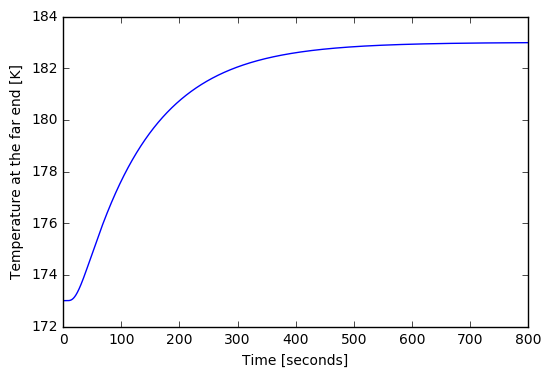

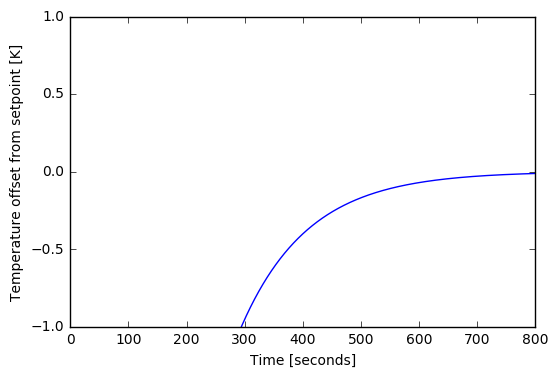

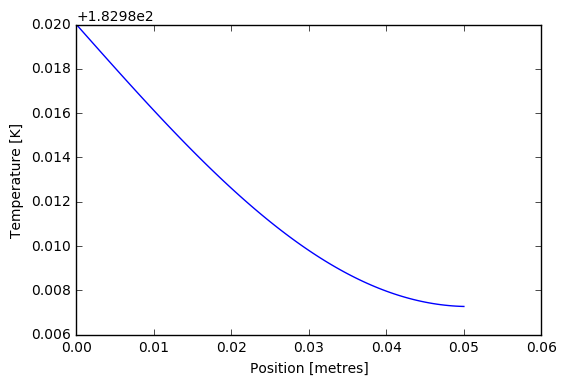

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
#matplotlib inline

# Define the 1D rod.

L  = 0.05    # Length in metres.
nx = 100     # The number of length steps in our model.
dx = L / nx  # The width of each step in metres.
x  = np.linspace(0, L, nx + 1)  # The array of lengths.

# Now for the times.

T  = 800.0   # How long in seconds to follow the evolution for.
nt = 15000   # The number of time steps.
dt = T / nt  # The length of each time step in seconds.
t  = np.linspace(0, T, nt + 1)  # The array of times.

# The diffusion constant, in metres squared per second.

k = 0.000009

# The initial temperature of the rod, in Kelvin.

initialTemperature = 173

# The desired temperature of the far end of the rod, in Kelvin.

setpoint = 183

# F is the diffusion constant, rendered dimensionless.

F = k * dt / dx**2

# OK, now it gets tricky, for an explanation of the Backward Euler method,
# google for "Backward Euler scheme 1D diffusion norwegian".

# We have to create a sparse matrix from its diagonal and off-diagonal
# elements. Set the lengths of the arrays we need.

main  = np.zeros(nx + 1)
lower = np.zeros(nx)
upper = np.zeros(nx)
b     = np.zeros(nx + 1)

# Precompute the sparse matrix diagonals.

main[:]  = 1 + 2 * F
lower[:] = -F
upper[:] = -F

# Insert boundary conditions. NOTE: I'm not sure that this is quite
# correct for our problem...

main[0]   = 1
main[nx]  = 1
lower[-1] = 0
upper[0]  = 0

# Now create the sparse matrix from the diagonals.

A = scipy.sparse.diags(
    diagonals=[main, lower, upper],
    offsets=[0, -1, 1],
    format='csr')

# Set the initial conditions. u(x) is the temperature at the next time
# step. u1(x) is the temperature at the current time step.

u  = initialTemperature * np.ones(nx + 1)
u1 = initialTemperature * np.ones(nx + 1)

# These two arrays are used to keep track of the time evolution.
# unx(t) is temperature at the far end of the rod as a function of time.
# u0(t) is the temperature at heater. We start by just making arrays
# of the right size, filled with zeros.

unx = np.zeros(nt + 1) 
u0  = np.zeros(nt + 1)

# Now loop over all times.

for n in range(0, nt + 1):
    b = u1
    
    # Set the boundary conditions.
    
    b[0] = setpoint
    b[-1] = b[-2]

    # Solve for the temperature at the next time step.
    
    u[:] = scipy.sparse.linalg.spsolve(A, b)
    
    # Keep a record of the temperatures at the ends of the rod
    # as a function of time.
    
    u0[n]  = u[0]
    unx[n] = u[-1]
    
    # Move to the next time step.
    u1[:] = u

# Plots.

plt.plot(t, unx)
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature at the far end [K]')
plt.show()

plt.plot(t, unx - setpoint)
plt.ylim(-1, 1)
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature offset from setpoint [K]')
plt.show()

plt.plot(x, u)
plt.xlabel('Position [metres]')
plt.ylabel('Temperature [K]')
plt.show()

As expected, the temperature at the far end of the rod trends towards 183K. It gets within 1K of the final temperature after 300 seconds. After 800 seconds the entire rod is within 13 millikelvin of the equilibrium temperature of 183K.

Now, suppose that we want to improve the performance of this system. Specifically, we want the far end of the rod to reach its final temperature more quickly. Clearly, we should put more heat in initially. One approach is to use a PID controller. The following program is identical to the previous one except that we vary the temperature at the near end of the rod using a PID algorithm.

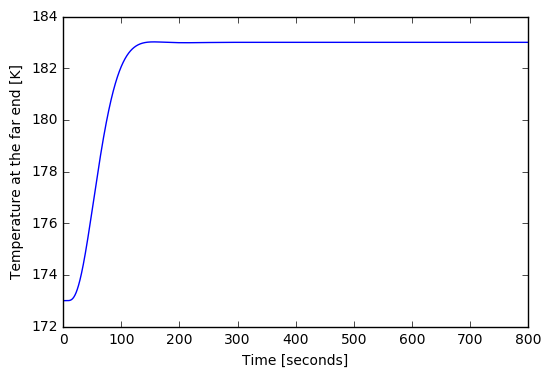

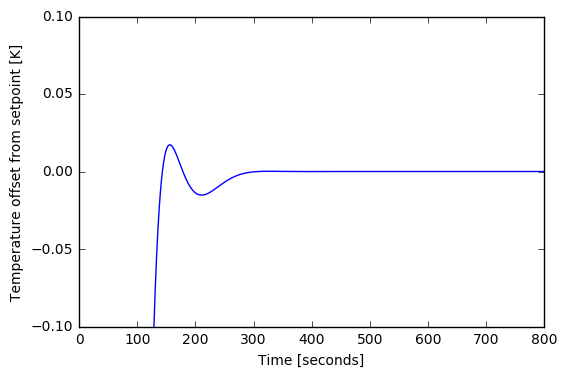

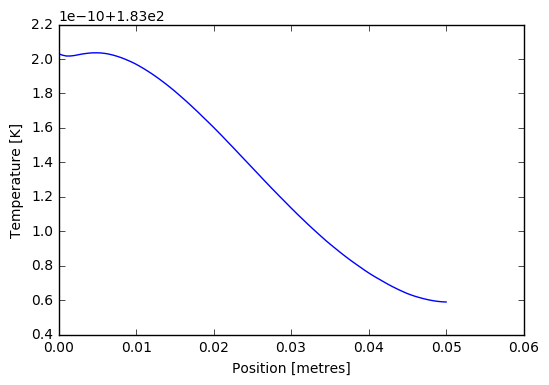

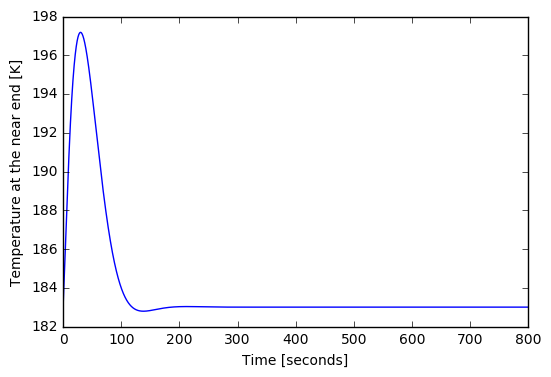

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
#matplotlib inline

# Define the 1D rod.

L  = 0.05    # Length in metres.
nx = 100     # The number of length steps in our model.
dx = L / nx  # The width of each step in metres.
x  = np.linspace(0, L, nx + 1)  # The array of lengths.

# Now for the times.

T  = 800.0   # How long in seconds to follow the evolution for.
nt = 15000   # The number of time steps.
dt = T / nt  # The length of each time step in seconds.
t  = np.linspace(0, T, nt + 1)  # The array of times.

# The diffusion constant, in metres squared per second.

k = 0.000009

# The initial temperature of the rod, in Kelvin.

initialTemperature = 173

# The desired temperature of the far end of the rod, in Kelvin.

setpoint = 183

# F is the diffusion constant, rendered dimensionless.

F = k * dt / dx**2

# OK, now it gets tricky, for an explanation of the Backward Euler method
# google for "Backward Euler scheme 1D diffusion norwegian".

# We have to create a sparse matrix from its diagonal and off-diagonal
# elements. Set the lengths of the arrays we need.

main  = np.zeros(nx + 1)
lower = np.zeros(nx)
upper = np.zeros(nx)
b     = np.zeros(nx + 1)

# Precompute the sparse matrix diagonals.

main[:]  = 1 + 2 * F
lower[:] = -F
upper[:] = -F

# Insert boundary conditions. NOTE: I'm not sure that this is quite
# correct for our problem...

main[0]   = 1
main[nx]  = 1
lower[-1] = 0
upper[0]  = 0

# Now create the sparse matrix from the diagonals.

A = scipy.sparse.diags(
    diagonals=[main, lower, upper],
    offsets=[0, -1, 1],
    format='csr')

# Set the initial conditions. u(x) is the temperature at the next time
# step. u1(x) is the temperature at the current time step.

u  = initialTemperature * np.ones(nx + 1)
u1 = initialTemperature * np.ones(nx + 1)

# These two arrays are used to keep track of the time evolution.
# unx(t) is temperature at the far end of the rod as a function of time.
# u0(t) is the temperature at heater. We start by just making arrays
# of the right size, filled with zeros.

unx = np.zeros(nt + 1) 
u0  = np.zeros(nt + 1)

# This is where we set the PID coefficients.
# The numbers below were found by trial and error.
# You can also use the Ziegler-Nichols method to find
# the coefficients.

Kp = 5      # The proportional coefficent.
Ki = 0.0795 # The integral coefficient.
Kd = 50     # The differential coefficient.

# Set the initial value of the integral term so that 
# The temperature setting at the near end of the rod
# is appropriate.

integral = (setpoint - Kp  * (setpoint - u[-1])) / Ki

# Keep track of whether this is the first time around the loop.

first = True

# Now loop over all times.

for n in range(0, nt + 1):
    b = u1
    
# Calculate the offset from the setpoint, and the integral
# and differential terms.

    error = setpoint - u[-1]
    integral += error * dt
    if first:
        derivative = 0
        first = False
    else:
        derivative = (error - prev_error) / dt
        
    prev_error = error

# Here is the PID calculation of the new temperature
# at the near end of the rod, where the heater is.
    
    heaterTemperature = Kp * error + Ki * integral + Kd * derivative

    # Set the boundary conditions.
        
    b[0]  = heaterTemperature
    b[-1] = b[-2]

    # Solve for the temperature at the next time step.
    
    u[:] = scipy.sparse.linalg.spsolve(A, b)
    
    # Keep a record of the temperatures at the ends of the rod
    # as a function of time.
    
    u0[n]  = u[0]
    unx[n] = u[-1]
    
    # Move to the next time step.
    u1[:] = u

# Plots.

plt.plot(t, unx)
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature at the far end [K]')
plt.show()

plt.plot(t, unx - setpoint)
plt.ylim(-0.1, 0.1)
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature offset from setpoint [K]')
plt.show()

plt.plot(x, u)
plt.xlabel('Position [metres]')
plt.ylabel('Temperature [K]')
plt.show()

plt.plot(t, u0)
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature at the near end [K]')
plt.show()


Note that this is a huge improvement over the previous result. We now settle to within a degree of the setpoint at 100 seconds (compared to 300 seconds before), within 0.02 of a degree at 140 seconds (compared with 750 seconds before), and the temperature of the entire rod is within 0.2 *nanokelvin* of the setpoint at 800 seconds! Looking at the last plot, which shows the heater temperature, you can see how the PID algorithm over-drives the heater initially, in order to increase the rate at which the far end of the rod approaches equilibrium. 